In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("HR_comma_sep.csv")
df.info()
#there are no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


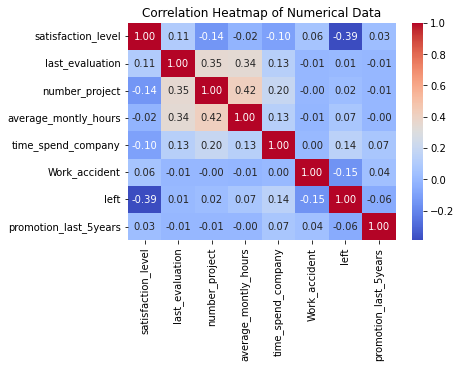

In [4]:
#heatmap
#red is a strong positive correlation
#yellow is no correlation
#blue is a strong negative correlation
numeric_df = df.select_dtypes(include='number').corr()
sns.heatmap(numeric_df, annot = True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Data")
plt.show()

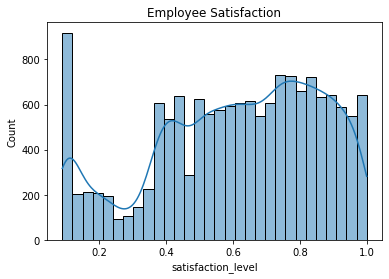

In [5]:
#histogram of employee satisfaction
sns.histplot(df["satisfaction_level"], kde = True)
plt.title("Employee Satisfaction")
plt.show()

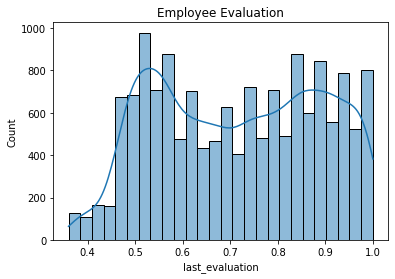

In [6]:
#histogram of employee evaluation
sns.histplot(df["last_evaluation"], kde = True)
plt.title("Employee Evaluation")
plt.show()

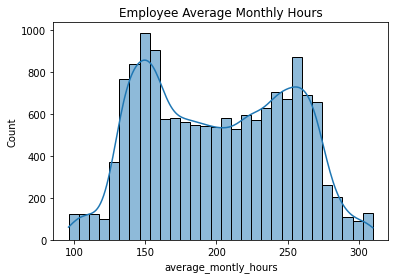

In [7]:
#histogram of Employee Average Monthly Hours
sns.histplot(df["average_montly_hours"], kde = True)
plt.title("Employee Average Monthly Hours")
plt.show()

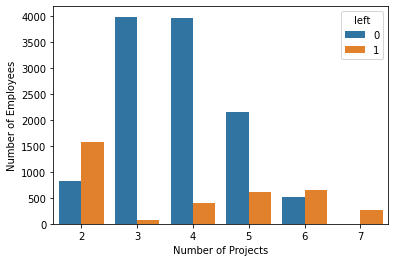

In [8]:
#bar chart for people that stayed
sns.countplot(data=df, x='number_project', hue='left')
plt.xlabel("Number of Projects")
plt.ylabel("Number of Employees")
plt.show()

#most people left after they completing 2 projects, but the number starts increasing when it gets to 6 and 7 projects.

In [9]:
#clustering of satisfaction_level, last_evaluation, and left
X = df[df['left'] == 1][['satisfaction_level', 'last_evaluation']].values


In [10]:
from sklearn.cluster import KMeans 

In [11]:
model = KMeans(n_clusters = 3, n_init = 10, init = 'k-means++', random_state = 42)
y_kmeans = model.fit_predict(X)

In [12]:
y_kmeans

array([0, 1, 2, ..., 0, 2, 0], dtype=int32)

"\nThe green cluster may indicate workers that perform well, but weren't satisfied or lost motivation\nThe blue cluster may indicate workers that perform well and happy, but they may have found better job opportunities \nThe red cluster may indicate workers that didn't perform well and were unhappy.\n"

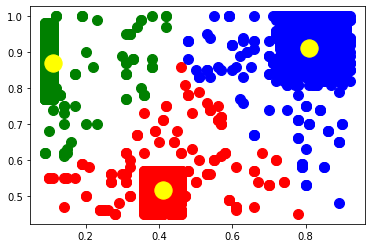

In [13]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

'''
The green cluster may indicate workers that perform well, but weren't satisfied or lost motivation
The blue cluster may indicate workers that perform well and happy, but they may have found better job opportunities 
The red cluster may indicate workers that didn't perform well and were unhappy.
'''

In [14]:
#Oversampling library
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

In [15]:
#seperate features and target variables
numerical_data = df.drop(['sales', 'salary','left'], axis=1)
categorical_data = df[['sales','salary']]

In [16]:
#do get dummies to categorical data
dummy_category = pd.get_dummies(categorical_data, drop_first=True, prefix='op')

In [17]:
#combine numerical and dummy categorical data
X = pd.concat([numerical_data, dummy_category], axis=1)
y = df['left']

In [18]:
#stratified split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify = y, random_state = 123)

In [19]:
#Upsample the train dataset using the SMOTE
smote = SMOTE(random_state = 123)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [20]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [21]:
#5 fold stratified cross validation
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 123)

In [22]:
#logistic regression model
log_regres = LogisticRegression(max_iter = 1000, random_state = 123)

In [23]:
#logistic regression cross validation prediction
log_pred = cross_val_predict(log_regres, X, y, cv = cv)

In [24]:
#logistic regression classification report
print(classification_report(y, log_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87     11428
           1       0.60      0.35      0.44      3571

    accuracy                           0.79     14999
   macro avg       0.71      0.64      0.66     14999
weighted avg       0.77      0.79      0.77     14999



In [25]:
# random forest model
rf_model = RandomForestClassifier(random_state=123)

In [26]:
# random forest cross validation prediction
rf_pred = cross_val_predict(rf_model, X, y, cv=cv)

In [27]:
# random forest classification report
print(classification_report(y, rf_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     11428
           1       0.99      0.97      0.98      3571

    accuracy                           0.99     14999
   macro avg       0.99      0.98      0.99     14999
weighted avg       0.99      0.99      0.99     14999



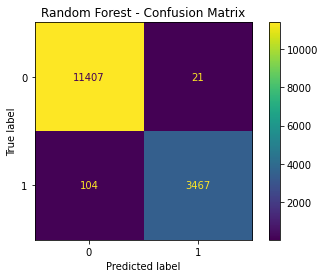

In [28]:
#random forest confusion matrix
disp = ConfusionMatrixDisplay.from_predictions(y, rf_pred)
disp.ax_.set_title("Random Forest - Confusion Matrix")
plt.show()

In [29]:
#gradient boosting model
gb_model = GradientBoostingClassifier(random_state=123)

In [30]:
#Gradient boosting cross validation prediction
gb_pred = cross_val_predict(gb_model, X, y, cv=cv)

In [31]:
#Gradient boosting classication report
print(classification_report(y, gb_pred))


              precision    recall  f1-score   support

           0       0.98      0.99      0.98     11428
           1       0.97      0.93      0.95      3571

    accuracy                           0.98     14999
   macro avg       0.97      0.96      0.97     14999
weighted avg       0.98      0.98      0.98     14999



In [32]:
from sklearn.metrics import roc_curve, roc_auc_score

Logistic Regression AUC: 0.8199664498766803


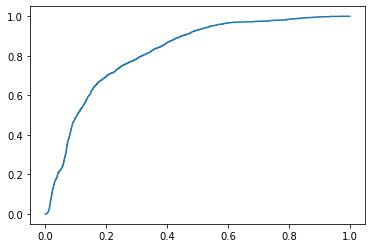

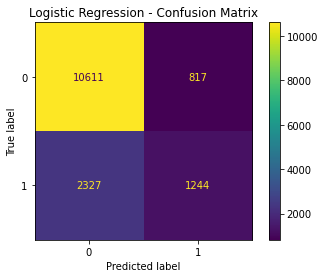

In [33]:
#logistic regression roc/auc plot
log_prob = cross_val_predict(log_regres, X, y, cv = cv, method='predict_proba')[:,1]
fpr_log, tpr_log, _ = roc_curve(y, log_prob)
auc_log = roc_auc_score(y, log_prob)

plt.plot(fpr_log, tpr_log)
print("Logistic Regression AUC:", auc_log)

#logistic regression confusion matrix
disp = ConfusionMatrixDisplay.from_predictions(y, log_pred)
disp.ax_.set_title("Logistic Regression - Confusion Matrix")
plt.show()

Random Forest Model AUC: 0.9939271326489875


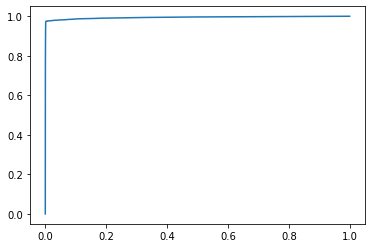

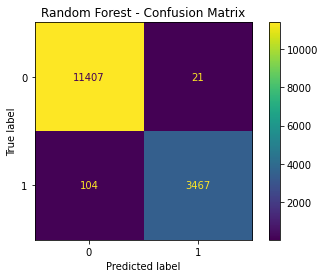

In [34]:
#Random Forest ROC/AUC plot
rf_prob = cross_val_predict(rf_model, X, y, cv = cv, method='predict_proba')[:,1]
fpr_rf, tpr_rf, _ = roc_curve(y, rf_prob)
auc_rf = roc_auc_score(y, rf_prob)

plt.plot(fpr_rf, tpr_rf)
print("Random Forest Model AUC:", auc_rf)

#random forest confusion matrix
disp = ConfusionMatrixDisplay.from_predictions(y, rf_pred)
disp.ax_.set_title("Random Forest - Confusion Matrix")
plt.show()

Gradient Boosting Model AUC: 0.98794170841278


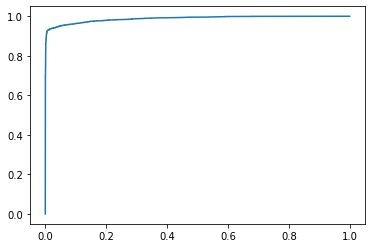

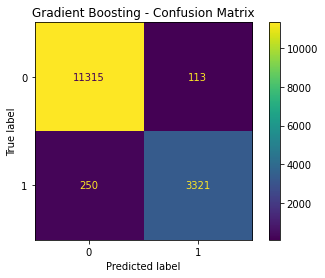

In [35]:
gb_prob = cross_val_predict(gb_model, X, y, cv = cv, method='predict_proba')[:,1]
fpr_gb, tpr_gb, _ = roc_curve(y, gb_prob)
auc_gb = roc_auc_score(y, gb_prob)

plt.plot(fpr_gb, tpr_gb)
print("Gradient Boosting Model AUC:", auc_gb)

#Gradient boosting confusion matrix
disp = ConfusionMatrixDisplay.from_predictions(y, gb_pred)
disp.ax_.set_title("Gradient Boosting - Confusion Matrix")
plt.show()

In [36]:
#We need to use the recall metric to find as many people at risk of leaving, so you can intervene and potentially stop them.

In [39]:
#using the random forest model because it had the highest percentage.
rf_model.fit(X_train, y_train)
#predicting the probability for the test set
y_prob = rf_model.predict_proba(X_test)[:, 1]

In [41]:
zone = pd.cut(y_prob, bins = [0, 0.2, 0.6, 0.9, 1.0], labels = ["Safe Zone (Green)", "Low-Risk Zone (Yellow)", "Medium-Risk Zone (Orange)", "High-Risk Zone (Red)"])

In [44]:
results = pd.DataFrame({"Turnover_Probability": y_prob, "Zone": zone})

In [45]:
results.head(20) 

,Turnover_Probability,Zone
0,0.00,NaN
1,0.45,Low-Risk Zone (Yellow)
2,0.00,NaN
3,0.00,NaN
4,0.00,NaN
5,0.01,Safe Zone (Green)
6,0.01,Safe Zone (Green)
7,0.00,NaN
8,0.00,NaN
9,0.01,Safe Zone (Green)


In [ ]:
"""
safe zone: you can do routine checkup surveys
Low risk zone: give more career development oppurtunities or feedback sessions
Medium risk zone: 1 on 1 meetings with higher ups, going over their workload, and potentially giving small incentives
High risk zone: meet with them immediately, promotions, salary negotiations, and flexible hours.
"""